<font color='red'>
Grade: A

Problem 1: Good.

Problem 2: Part (c): The ranges of the hyperparameters are incorrect.

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import scipy.io as sio
import matplotlib as mpl
from matplotlib.pylab import rcParams
from sklearn.decomposition import PCA

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/siuyinlee/OneDrive/School/Math 5027 Machine Learning/HW


## Problem 1

#### 1. Load the data use scipy.io.loadmat. Get the feature matrix. Each row of the feature matrix is an image. Plot the first 100 images, using subplot to make a 10 by 10 image matrix. Do you see some familiar faces? (Hint: recall how we plot images for the MNIST dataset. Use cmap=mpl.cm.gist_gray. If you see the image is rotated, set the "order" variable when you reshape the data. Also make the figure bigger if needed use rcParams as we did before.)

In [3]:
#Load faces image data
faces = sio.loadmat("Data/faces.mat")

In [4]:
#Extract feature matrix
X = faces['X']

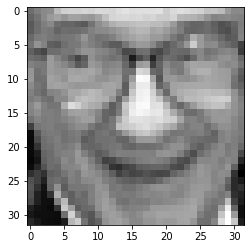

In [5]:
#Try to see the first instance of the face images
face_one = X[0,:]
face_one_image = face_one.reshape((32,32), order='F')
plt.imshow(face_one_image, cmap=mpl.cm.gist_gray)

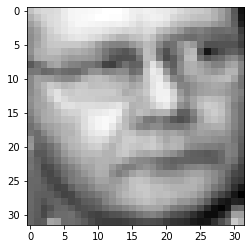

In [6]:
#Try to see the 2nd instance of the face images
face_two = X[1,:]
face_two_image = face_two.reshape((32,32), order='F')
plt.imshow(face_two_image, cmap=mpl.cm.gist_gray)

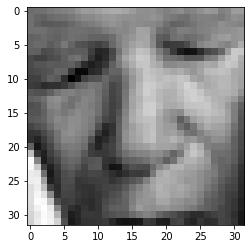

In [7]:
#Try to see the 100th instance of the face images
face_two = X[99,:]
face_two_image = face_two.reshape((32,32), order='F')
plt.imshow(face_two_image, cmap=mpl.cm.gist_gray)

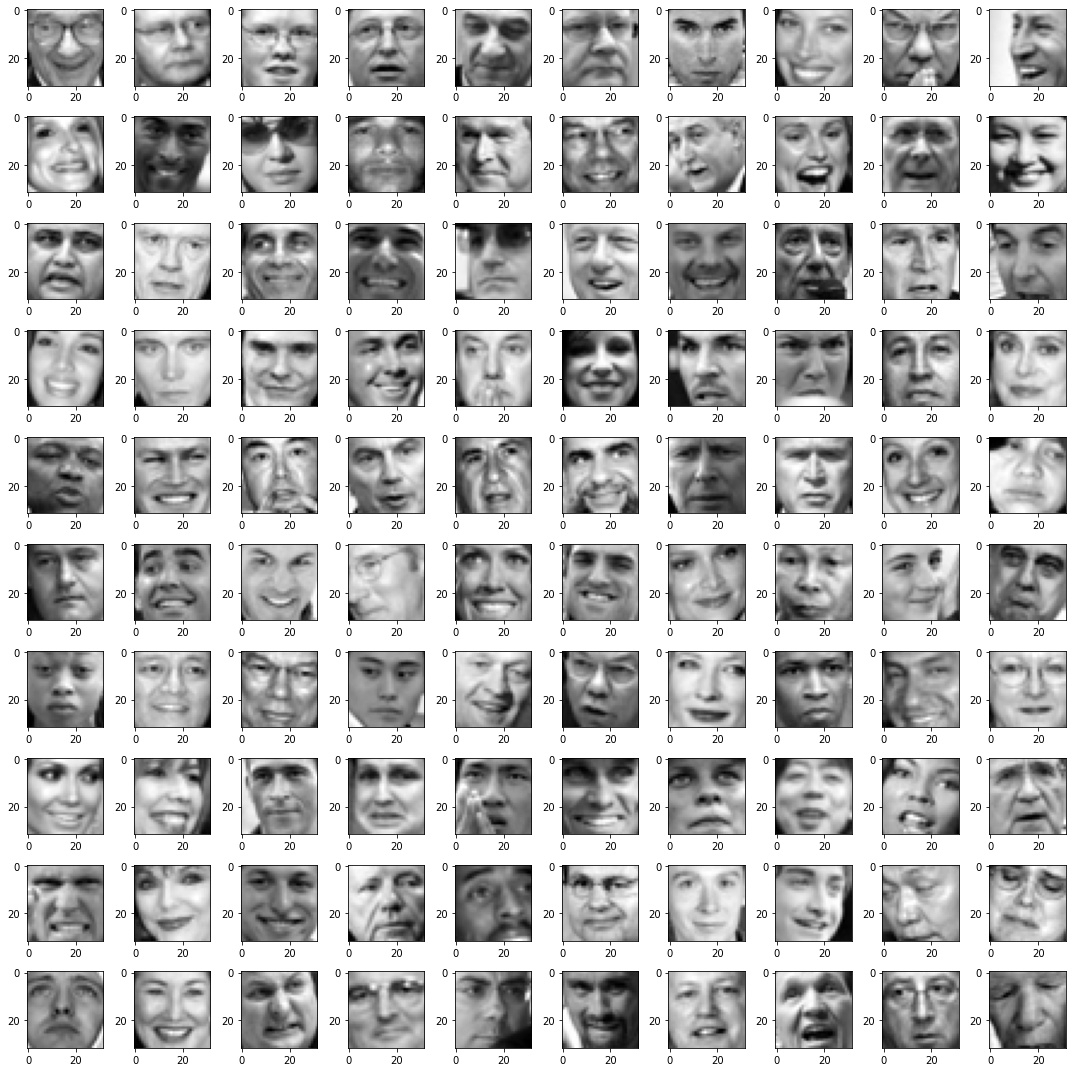

In [8]:
#Get a 10x10 grid with first 100 faces
rcParams['figure.figsize'] = 15, 15
for i in range(100):
    plt.subplot(10, 10, i+1)
    img = X[i,:].reshape((32,32),order='F')
    plt.imshow(img,cmap = mpl.cm.gist_gray)
    plt.tight_layout()

Ans: I don't know most of the faces, but can recognize Clinton and Bush.

#### 2. Scale the feature matrix first. Perform a PCA for the scaled feature matrix to get all of the principal components. Plot the first 36 principal components in a 6 by 6 image matrix.

In [9]:
#Scale the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
#Perform pca on scaled feature data, keep all components
pca = PCA()
pca.fit(X_scaled)

PCA()

In [11]:
#See components
pca_comp = pca.components_

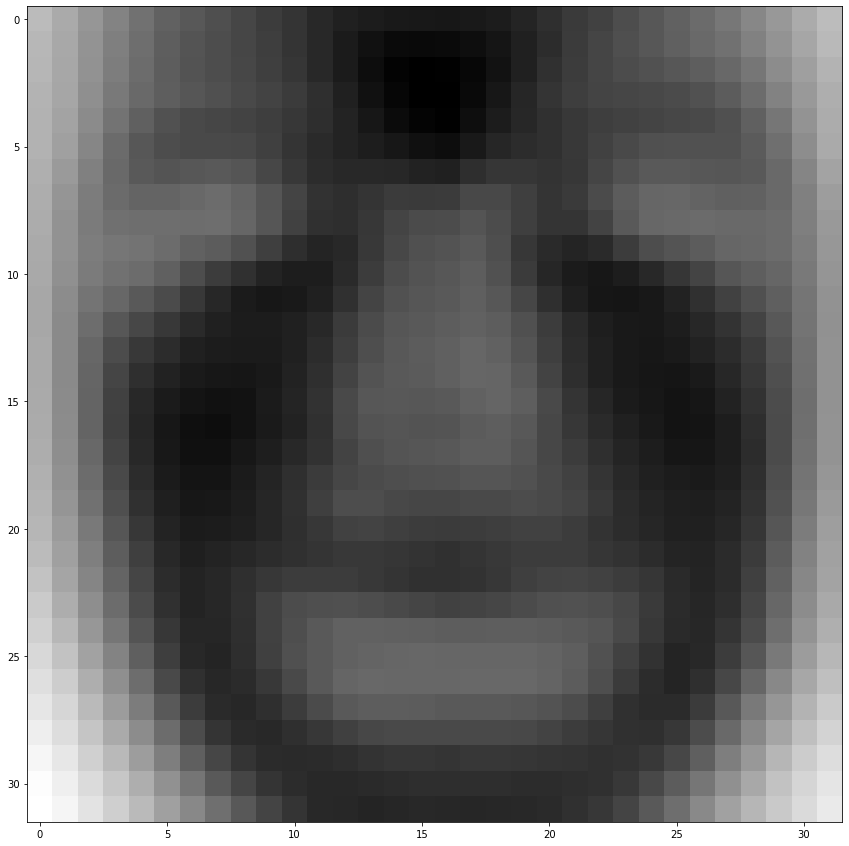

In [12]:
#Try to see the first pca component of the face images
face_pca_one = pca_comp[0,:]
face_pca_one_image = face_pca_one.reshape((32,32), order='F')
plt.imshow(face_pca_one_image, cmap=mpl.cm.gist_gray)

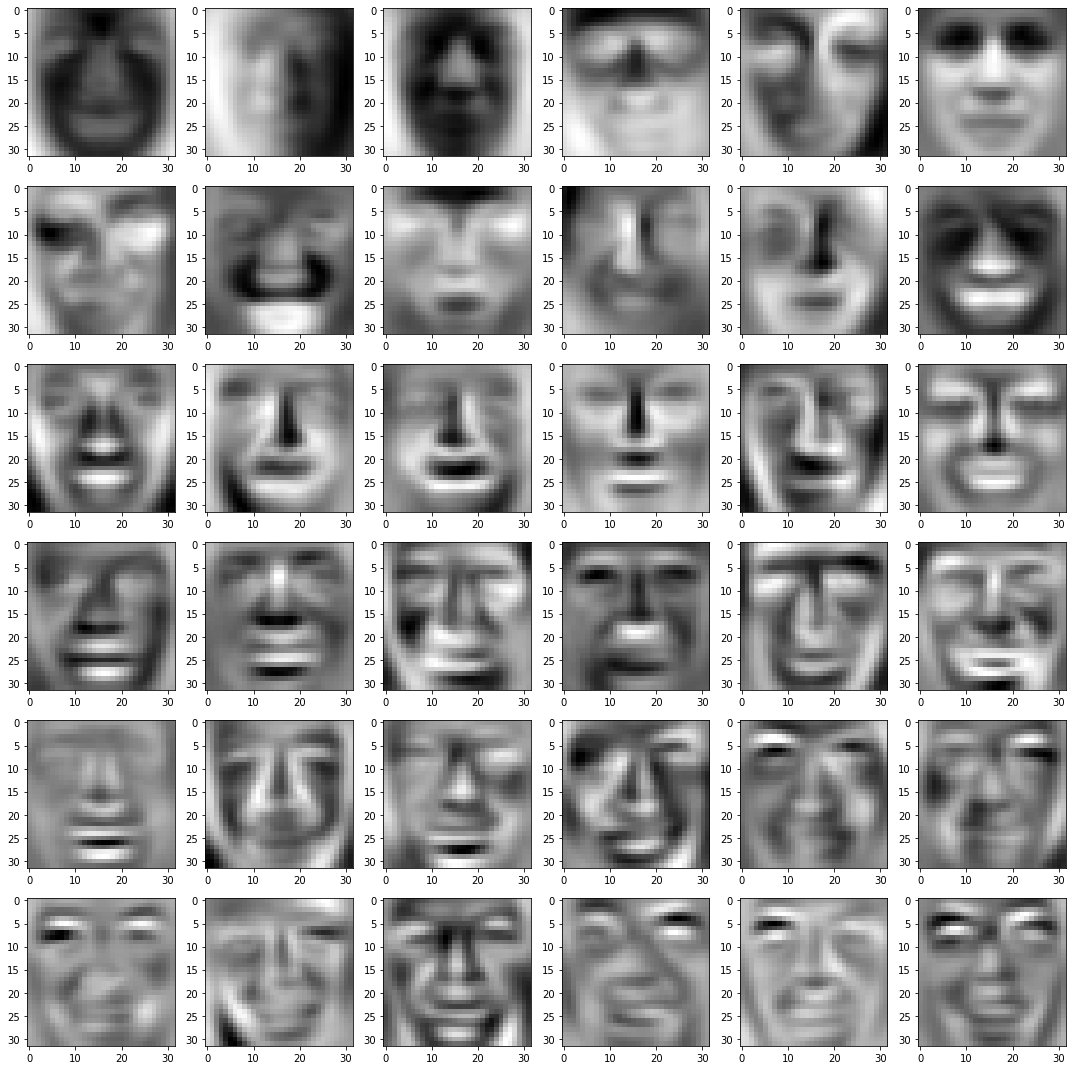

In [13]:
#Get a 6x6 grid with first 36 pca component faces
rcParams['figure.figsize'] = 15, 15
for i in range(36):
    plt.subplot(6, 6, i+1)
    img = pca_comp[i,:].reshape((32,32),order='F')
    plt.imshow(img,cmap = mpl.cm.gist_gray)
    plt.tight_layout()

#### 3. To have $95\%$ of the variance explained, what is the minimum number of principal components that are needed?

In [14]:
#See the cumulative sum of the pca explained variance ratio
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.329126  , 0.45699592, 0.51040757, ..., 0.99999959, 0.99999981,
       1.        ])

In [15]:
#Find the number of pca needed to have at least 95% of the variance explained
d = np.argmax(cumsum >= 0.95) + 1
d

130

Ans: We need at least 130 pca to get 95% of the variance explained.

#### 4. Build a PCA with 100 principal components. Project the data to the 100 principal components and perform an inverse transform back to the original dimension. Plot the first 100 images (10 by 10 image matrix) using the scaled feature matrix, and then plot the first 100 images using the recovered data. What do you see?

In [16]:
#Perform pca on scaled feature data, use 100 components
#Project the data onto the 100 pca and inverse transform back to the original dimension
pca_100 = PCA(n_components=100)
X_scaled_reduced = pca_100.fit_transform(X_scaled)
X_scaled_recovered = pca_100.inverse_transform(X_scaled_reduced)
X_scaled_recovered.shape

(5000, 1024)

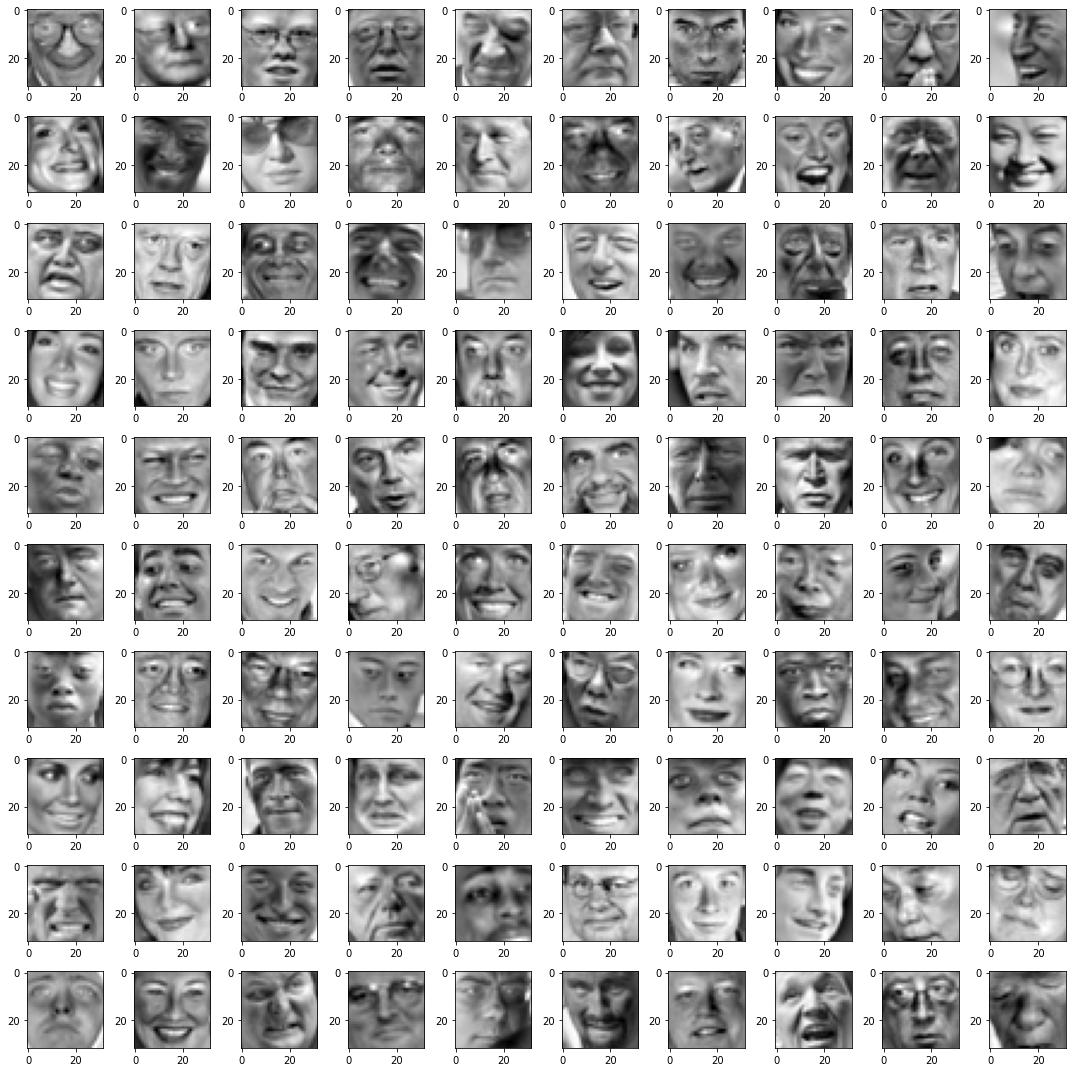

In [17]:
#Plot the first 100 (10x10) using the scaled feature matrix
rcParams['figure.figsize'] = 15, 15
for i in range(100):
    plt.subplot(10, 10, i+1)
    img = X_scaled[i,:].reshape((32,32),order='F')
    plt.imshow(img,cmap = mpl.cm.gist_gray)
    plt.tight_layout()

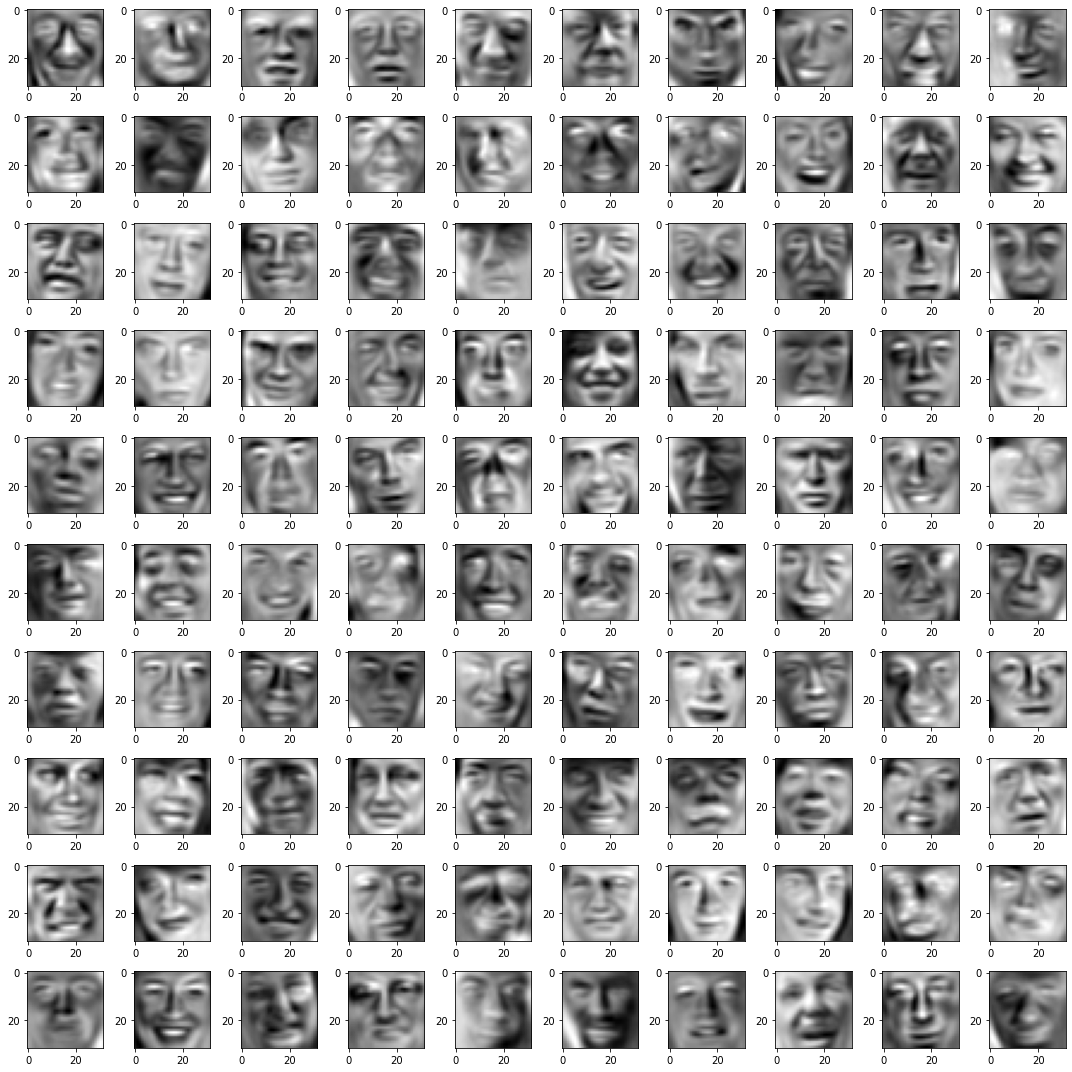

In [18]:
#Plot the first 100 (10x10) using the recovered data
rcParams['figure.figsize'] = 15, 15
for i in range(100):
    plt.subplot(10, 10, i+1)
    img = X_scaled_recovered[i,:].reshape((32,32),order='F')
    plt.imshow(img,cmap = mpl.cm.gist_gray)
    plt.tight_layout()

The recovered data's images lost quite a lot of clarity compared to the original scaled data's images, so some of the faces are not recognizable anymore. But all in all, the recovered images still retain the general important features of the images.


## Problem 2

#### Revisit Problem 2 HW 3. Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

In [19]:
#Read file and set column names
p2df = pd.read_table('Data/HW3P2.txt',  delimiter=' ', names=["x1","x2","y"])

#look at the head and count of the dataset
p2df.head()

,x1,x2,y
0,0.107143,0.603070,1.0
1,0.093318,0.649854,1.0
2,0.097926,0.705409,1.0
3,0.155530,0.784357,1.0
4,0.210829,0.866228,1.0


#### (a) Try a Support Vector Machine classifier (sklearn.svm.SVC), with various hyperparameters: kernel="linear", C in the range of 1 and 100 with 50 equidistant points; and kernel="rbf", C in the range of 1 and 100 with 50 equidistant points, and gamma in the range of 0.0001 and 2 with 50 equidistant points. Show the best parameters and best mean test score. In SVC, set random_state to 10.

In [20]:
# Define X features (use first 2 columns) and y response (last column)
X = p2df.iloc[:, :2]
y = p2df.iloc[:, -1]

#Set up SVM classifier pipeline with scaler included
kernel_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(random_state=10))
])

In [21]:
#Check the list of parameters for the SVC classifier
kernel_clf.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'svm_clf', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'svm_clf__C', 'svm_clf__break_ties', 'svm_clf__cache_size', 'svm_clf__class_weight', 'svm_clf__coef0', 'svm_clf__decision_function_shape', 'svm_clf__degree', 'svm_clf__gamma', 'svm_clf__kernel', 'svm_clf__max_iter', 'svm_clf__probability', 'svm_clf__random_state', 'svm_clf__shrinking', 'svm_clf__tol', 'svm_clf__verbose'])

In [22]:
#Set a parameter grid search dictionary to specify the parameters and range we want to search
#Two grids required by question 2a are specified as the following:

param_grid = [
    {'svm_clf__kernel':['linear'], 'svm_clf__C': np.linspace(1,100,50)},
    {'svm_clf__kernel':['rbf'], 'svm_clf__C': np.linspace(1,100,50), 'svm_clf__gamma': np.linspace(0.0001,2,50)},
    ]

In [23]:
#Set up GridSearcCV using required grids, cv=10, scoring = accuracy
grid_search = GridSearchCV(kernel_clf, param_grid, cv=10, scoring="accuracy")

In [24]:
#Do the fit using grid_search
grid_search.fit(X,y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(random_state=10))]),
             param_grid=[{'svm_clf__C': array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.3673...
       1.14290000e+00, 1.18371429e+00, 1.22452857e+00, 1.26534286e+00,
       1.30615714e+00, 1.34697143e+00, 1.38778571e+00, 1.42860000e+00,
       1.46941429e+00, 1.51022857e+00, 1.55104286e+00, 1.59185714e+00,
       1.63267143e+00, 1.67348571e+00, 1.71430000e+00, 1.75511429e+00,
       1.79592857e+00, 1.83674286e+00, 1.87755714e+00, 1.91837143e+00,
       1.95918571e+00, 2.00000000e+00]),
                          'svm_clf__kernel': ['rbf']}],
             scoring='accuracy')

In [25]:
#See best parameter combinations using grid search
print("The best parameters using grid search are", grid_search.best_params_)

The best parameters using grid search are {'svm_clf__C': 53.53061224489795, 'svm_clf__gamma': 1.1020857142857143, 'svm_clf__kernel': 'rbf'}


In [26]:
#See best mean test score
print("The best mean test score using grid search is", grid_search.cv_results_['mean_test_score'].max())

The best mean test score using grid search is 0.9256348569901096


#### (b) Make a decision boundary plot with the best parameters from (a)

In [27]:
grid_search.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf',
                 SVC(C=53.53061224489795, gamma=1.1020857142857143,
                     random_state=10))])

In [28]:
best_clf = grid_search.best_estimator_


Text(0.5, 1.0, 'Decision Boundaries for SVM models using parameters chosen by grid search')

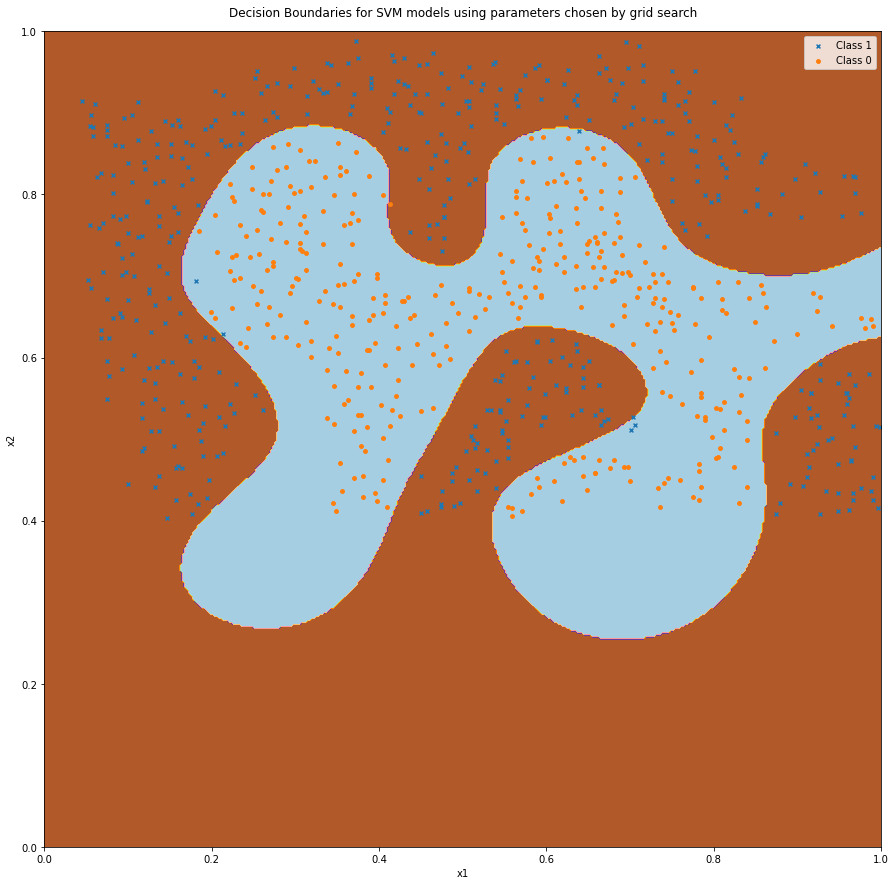

In [29]:
# Plot the decision boundary

#subset dataframe into y=1 and y=0
One = p2df[p2df['y'] == 1]
Zero = p2df[p2df['y'] == 0]

# generate grid
x1 = np.linspace(0, 1, 400)
x2 = np.linspace(0, 1, 400)
X1, X2 = np.meshgrid(x1,x2)

# flatten X1 and X2
r1, r2 = X1.flatten(), X2.flatten() #shape = (160k,)

# make r1 and r2 2D
r1, r2 = r1.reshape((len(r1),1)), r2.reshape((len(r2),1)) #shape = (160k,1)

# horizontally stack r1 and r2
grid = np.hstack((r1,r2)) #shape = (160k,2)

# now grid is a feature matrix
# get predicted labels for grid
yhat = best_clf.predict(grid) #for each combination of x1 and x2 in the grid, predict 1 or 0 using defined model

# reshape yhat so that it has the same shape as X1 and X2 (which is 400,400 here)
ZZ = yhat.reshape(X1.shape)

# Plot contour graph with 2 color based on ZZ/yhat's values
plt.contourf(X1, X2, ZZ, cmap = 'Paired')

#Within X, Filter out class 1, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(One.iloc[:,0], One.iloc[:,1], marker='x', label='Class 1', s=15)
#Within X, Filter out class 0, use first column as x-values in plot, 2nd column as y-values in plot
plt.scatter(Zero.iloc[:,0], Zero.iloc[:,1], marker='o', label='Class 0', s=15)
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Decision Boundaries for SVM models using parameters chosen by grid search', pad = 15)

#### (c) Use a randomized search to repeat Part (a), but use 1000 randomly chosen parameter combinations

In [30]:
#Set distributions dictionary
distributions = [
    {'svm_clf__kernel': ['linear'], 'svm_clf__C': uniform(loc=1, scale=100)},
    {'svm_clf__kernel':['rbf'], 'svm_clf__C': uniform(loc=1, scale=100), 'svm_clf__gamma': uniform(loc=0.0001, scale=2)},
    ]

In [31]:
rnd_search = RandomizedSearchCV(kernel_clf, distributions, cv=10, scoring="accuracy", n_iter=1000)

In [32]:
#Do the fit using grid_search
rnd_search.fit(X,y)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svm_clf',
                                              SVC(random_state=10))]),
                   n_iter=1000,
                   param_distributions=[{'svm_clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f48ca8ca0>,
                                         'svm_clf__kernel': ['linear']},
                                        {'svm_clf__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f48ca8790>,
                                         'svm_clf__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f7f48ca84f0>,
                                         'svm_clf__kernel': ['rbf']}],
                   scoring='accuracy')

In [33]:
#See best parameter combinations using randomized search and compare with that of grid search
print("The best parameters using randomized search are", rnd_search.best_params_)
print("The best parameters using grid search are", grid_search.best_params_)

The best parameters using randomized search are {'svm_clf__C': 58.442142363073636, 'svm_clf__gamma': 1.1133429444086904, 'svm_clf__kernel': 'rbf'}
The best parameters using grid search are {'svm_clf__C': 53.53061224489795, 'svm_clf__gamma': 1.1020857142857143, 'svm_clf__kernel': 'rbf'}


In [34]:
#See best mean test score using randomized search and compare with that of grid search
print("The best mean test score using randomized search is", rnd_search.cv_results_['mean_test_score'].max())
print("The best mean test score using grid search is", grid_search.cv_results_['mean_test_score'].max())

The best mean test score using randomized search is 0.9244720662924353
The best mean test score using grid search is 0.9256348569901096


#### (d) Compare the best mean test scores in (a) and (c). Are they close or very different?

Ans: Comparing the best mean test scores in (a) and (c), they are very close. The grid search and randomized search for this question lead to very similiar sets of best parameters and best mean test scores.